<a href="https://colab.research.google.com/github/YuvrazError/Covid-19-Dataset-Visualization-/blob/main/Covid_19_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
data = pd.read_csv('covid_19_clean_complete.csv')
data['Date'] = pd.to_datetime(data['Date'])

# **Line Plot: Total Cases Over Time**

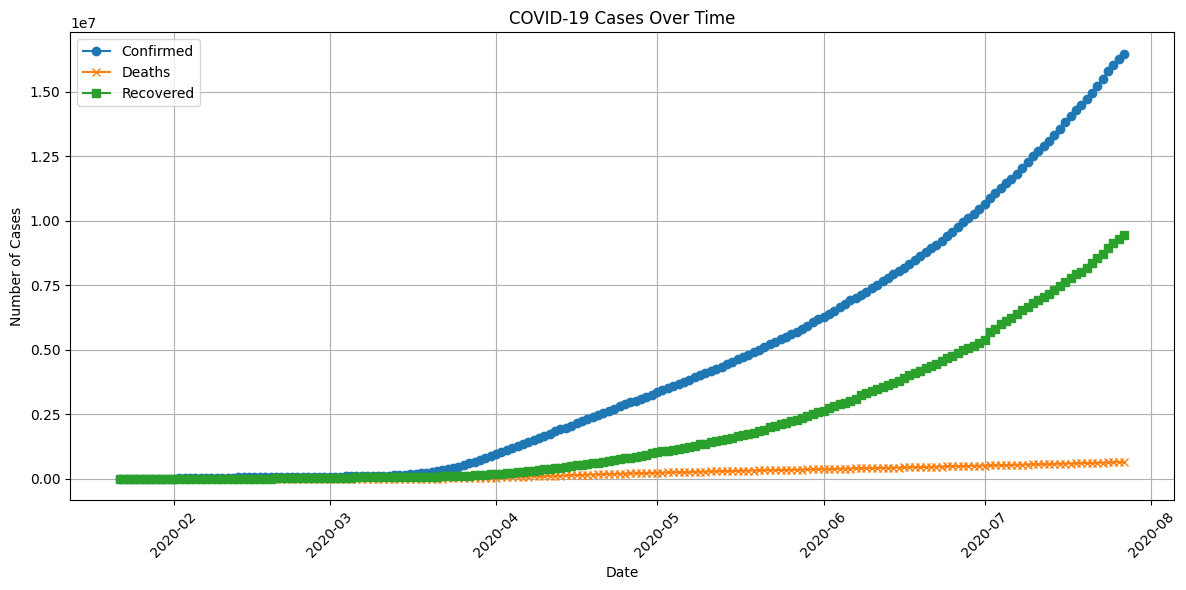

In [21]:
datewise = data.groupby(['Date']).agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'}).reset_index()

plt.figure(figsize=(12, 6))

plt.plot(datewise['Date'], datewise['Confirmed'], label='Confirmed', marker='o')
plt.plot(datewise['Date'], datewise['Deaths'], label='Deaths', marker='x')
plt.plot(datewise['Date'], datewise['Recovered'], label='Recovered', marker='s')

plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Cases Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


# **Bar Plot: Total Cases by Country**

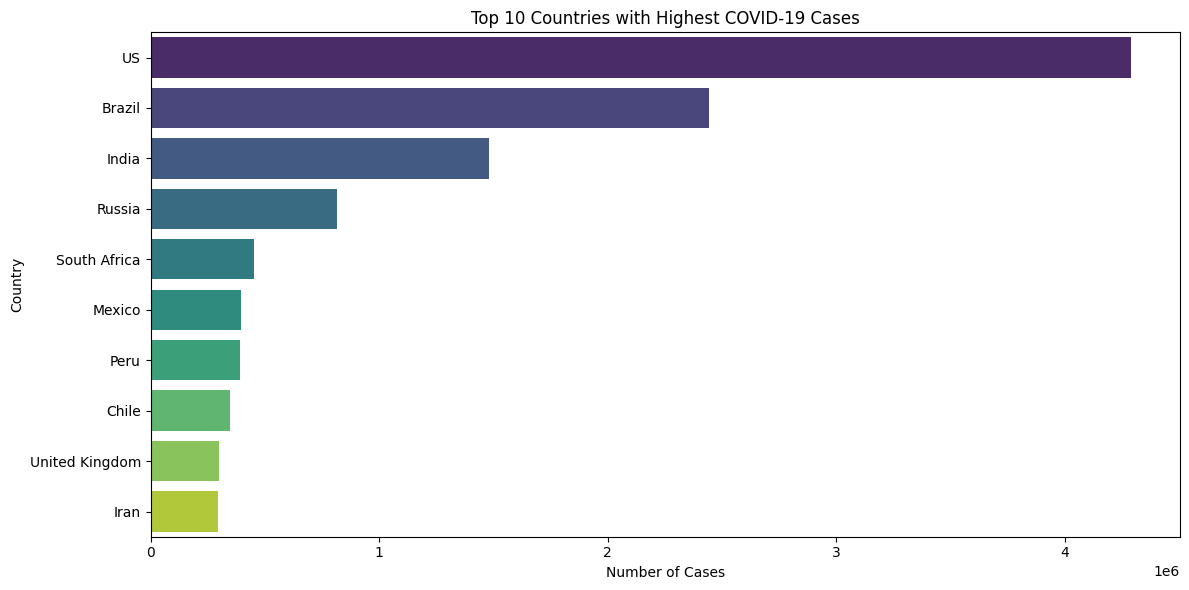

In [22]:
plt.figure(figsize=(12, 6))

countrywise = data.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False)[:10]

sns.barplot(x=countrywise.values, y=countrywise.index, palette='viridis')
plt.xlabel('Number of Cases')
plt.ylabel('Country')
plt.title('Top 10 Countries with Highest COVID-19 Cases')
plt.tight_layout()

plt.show()

# **Pie Chart: Proportion of Cases**

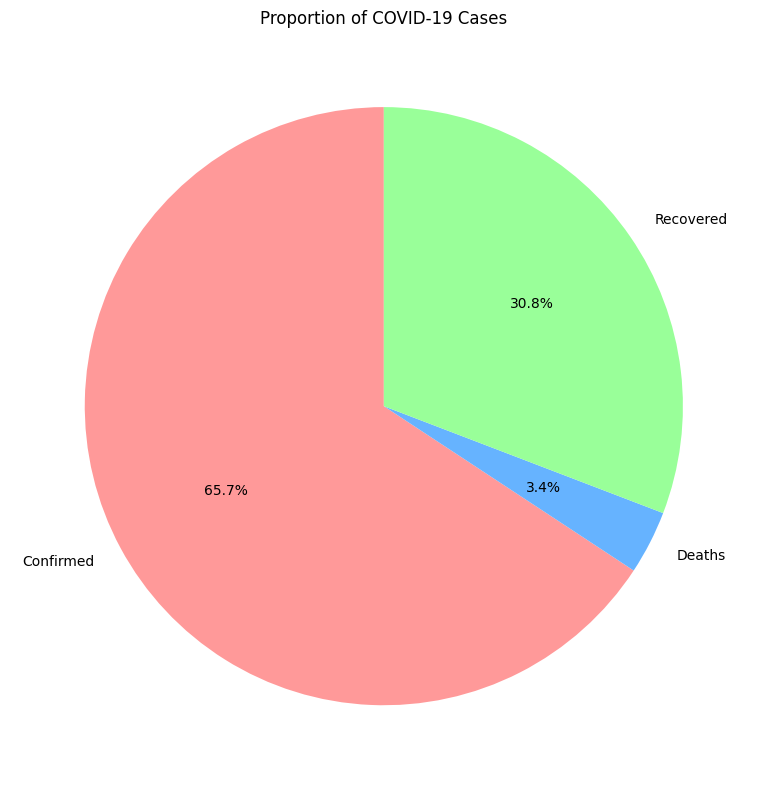

In [23]:
plt.figure(figsize=(8, 8))

labels = ['Confirmed', 'Deaths', 'Recovered']
sizes = [data['Confirmed'].sum(), data['Deaths'].sum(), data['Recovered'].sum()]
colors = ['#ff9999','#66b3ff','#99ff99']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of COVID-19 Cases')
plt.tight_layout()

plt.show()

# **Scatter Plot: Cases Scatter Plot by Date**

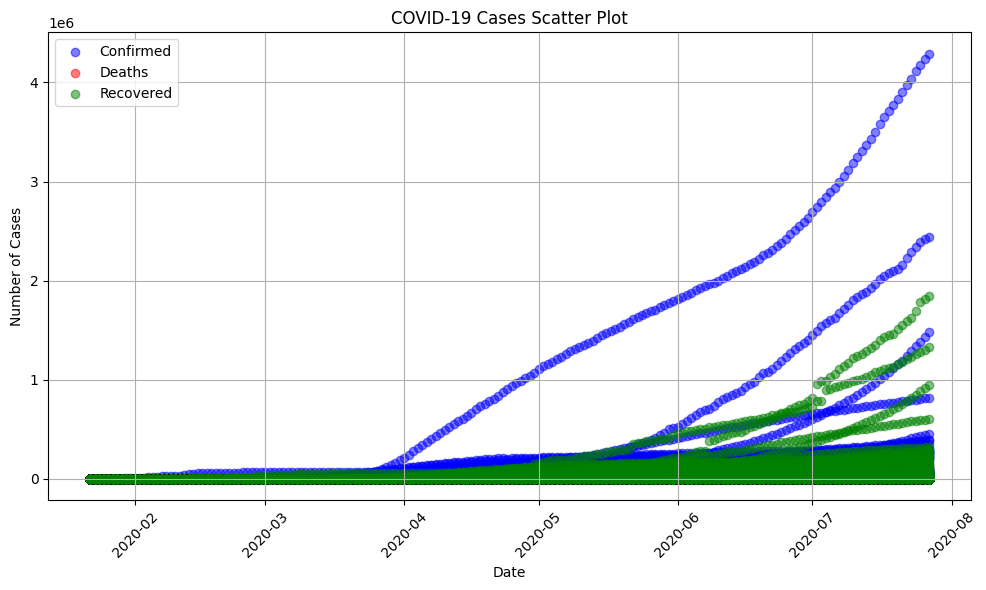

In [24]:
plt.figure(figsize=(10, 6))

plt.scatter(data['Date'], data['Confirmed'], color='blue', label='Confirmed', alpha=0.5)
plt.scatter(data['Date'], data['Deaths'], color='red', label='Deaths', alpha=0.5)
plt.scatter(data['Date'], data['Recovered'], color='green', label='Recovered', alpha=0.5)

plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Cases Scatter Plot')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# **Heatmap: Correlation Matrix**

<ipython-input-25-0ef98dbcf9b1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


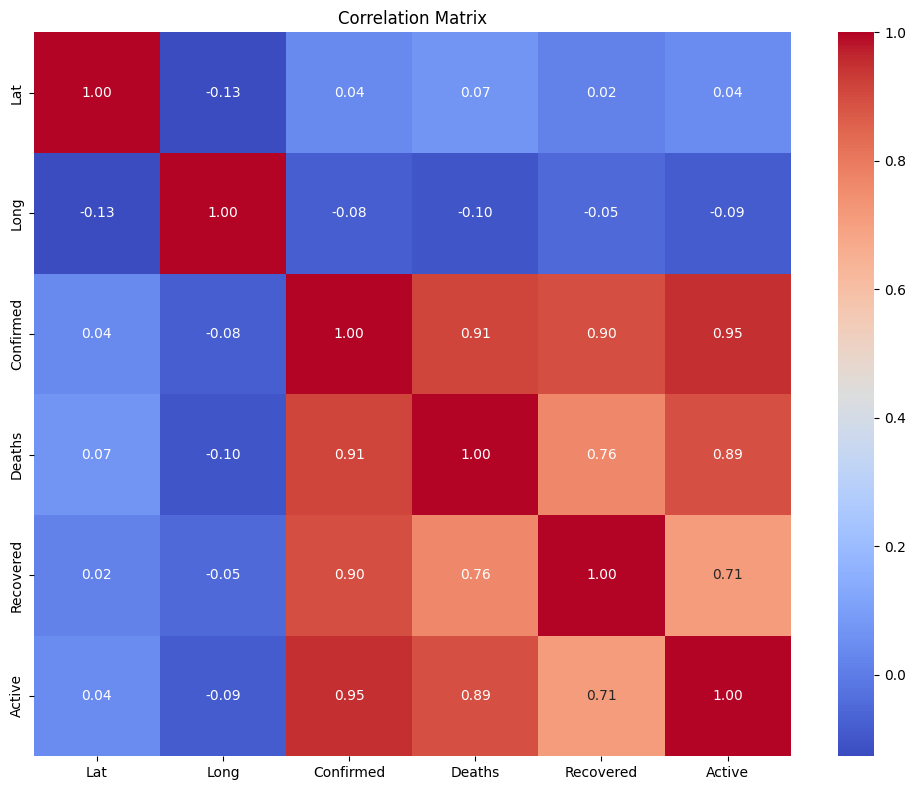

In [25]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# **Histogram: Distribution of Confirmed Cases**

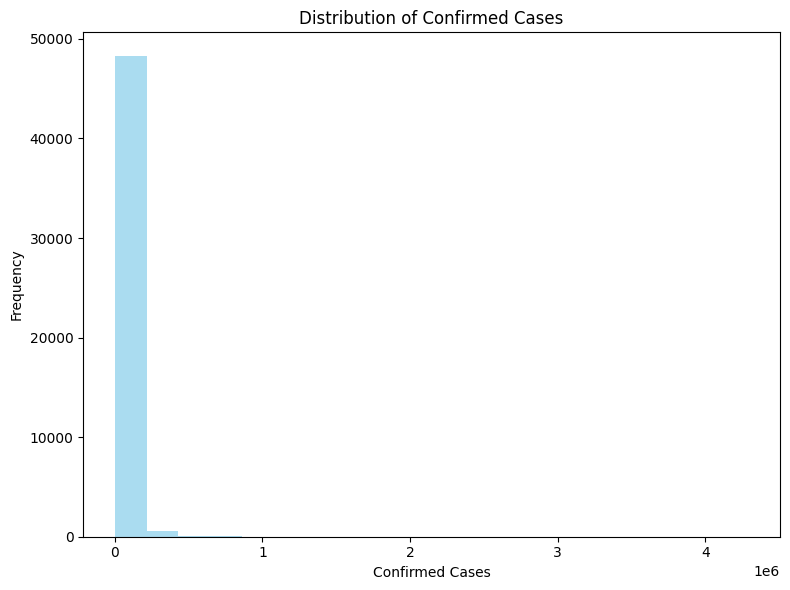

In [26]:
plt.figure(figsize=(8, 6))
plt.hist(data['Confirmed'], bins=20, color='skyblue', alpha=0.7)
plt.xlabel('Confirmed Cases')
plt.ylabel('Frequency')
plt.title('Distribution of Confirmed Cases')
plt.tight_layout()
plt.show()

# **Box Plot: Outlier Detection in Deaths**

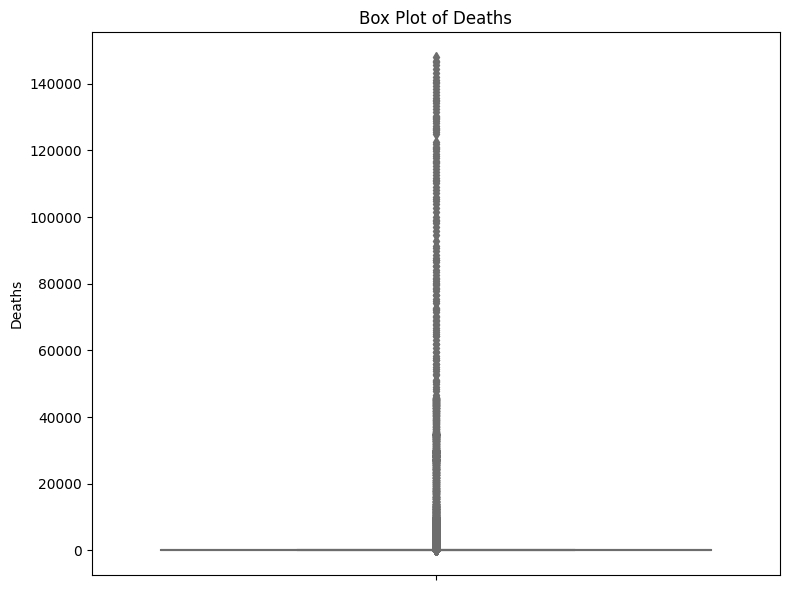

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['Deaths'], color='salmon')
plt.ylabel('Deaths')
plt.title('Box Plot of Deaths')
plt.tight_layout()
plt.show()


# **Area Chart: Daily Cases Over Time**

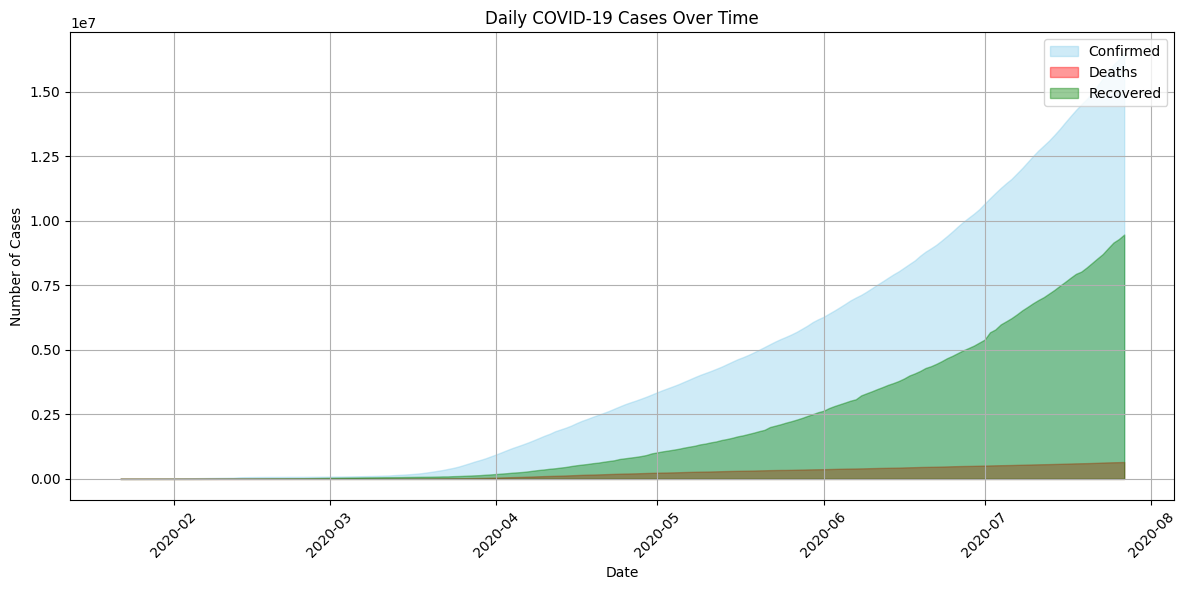

In [28]:
daily_cases = data.groupby('Date').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'}).reset_index()

plt.figure(figsize=(12, 6))
plt.fill_between(daily_cases['Date'], daily_cases['Confirmed'], color='skyblue', alpha=0.4, label='Confirmed')
plt.fill_between(daily_cases['Date'], daily_cases['Deaths'], color='red', alpha=0.4, label='Deaths')
plt.fill_between(daily_cases['Date'], daily_cases['Recovered'], color='green', alpha=0.4, label='Recovered')

plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Daily COVID-19 Cases Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
